# Train Test Split

## 1 step Set up data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/vazgenosipov/Desktop/Python/Python Data analys/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")



In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


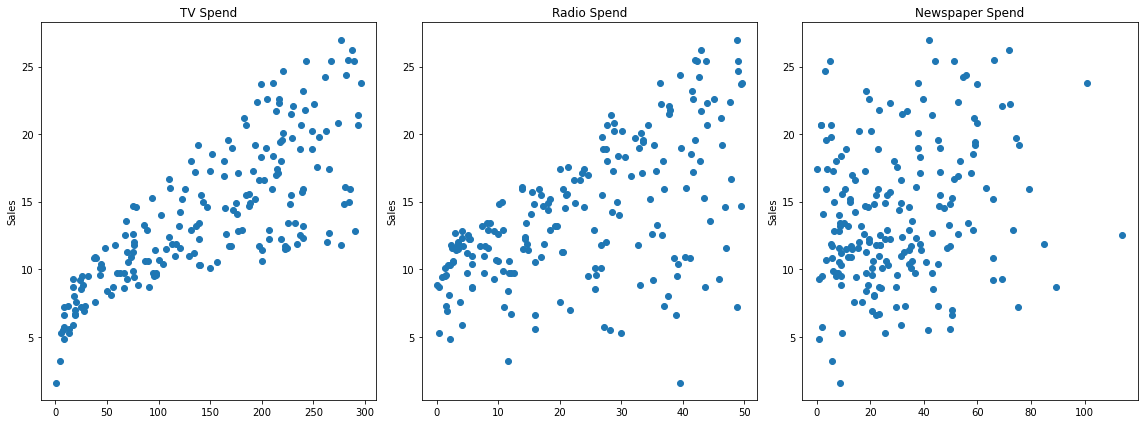

In [5]:
# lets plot every x on y

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

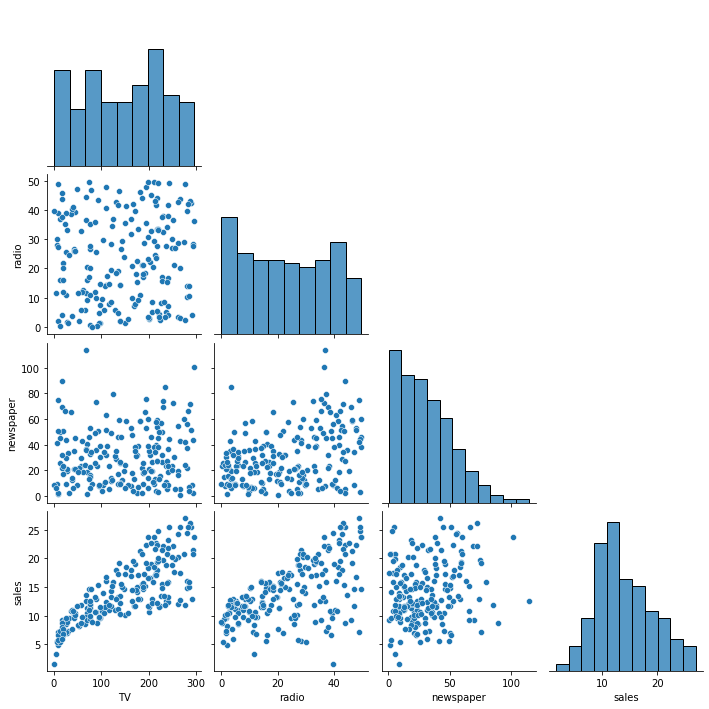

In [8]:
# another way to do so is to run sns

sns.pairplot(data=df,corner=True);

In [12]:
# separate Features from Labels


# for features drop non-featurs columns
# in this case only drop sales (since it is label)
x = df.drop("sales",axis = 1)

In [14]:
x[:3]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [15]:
# create Y vector Label


y = df["sales"]

In [19]:
y[:2]

0    22.1
1    10.4
Name: sales, dtype: float64

## 2 step Separate a training set and a test set

In [20]:
# taining set will train the data 
# test set will see how well the model has 
# learned to predict the outcome

# import the tool to do it
from sklearn.model_selection import train_test_split


In [22]:
# use build-in example in train_test_split (use shift tab)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
# test size asks you what percentage of the data 
# should go to the test set

# random_state almost exact as random_seed helps split data
# basically desides which number is test and which train 
# used to apply to different models to compare their performance
# so that every model has the same split


In [23]:
# now lets compare the rows inside each column

len(df)

200

In [24]:
# the reason is because 30% of the rows are dedicated to test

len(X_train)

140

In [27]:
X_train.head()

# it has index possitions 
# based of original df
# to match up with Y-train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [30]:
y_train.head()

# same index positions to match up

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression

# from libriary 
# choose the psecific devision 
# and choose the model you need to import 

In [32]:
# create an instance of lenear regression
# this model has parameters also refered as hyper-parameters
# in machine learning 
# basically parameters within model that you can add to
# improve the performace of teh model 


model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

# insert the training data into the model 
# this commanda happends in place 

LinearRegression()

## 3 step Performance evaluation

In [36]:
model.predict(X_test)

# now lets inser the test values of x
# it will create y values based of x_test values
# by the help of the model that is build by X_train, Y_train

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [38]:
X_test.head()

# this is the values of the test fraction of data
# which we incert in the model to see the result 
# of how it will predict the y data 

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [39]:
y_test.head()

# this is the real y data to the correspondong x values to 
# make the comparison from

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [40]:
# create an array of predicted values of Y
 
test_predictions = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [58]:
round(df["sales"].mean(),2)

14.02

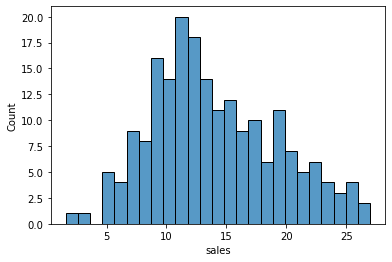

In [56]:
sns.histplot(data=df, x = "sales", bins=25);

# visually understands the data

In [54]:
# mean_absolute_error (MAE)

# will tell us on average I am off by some amount 
# hard to see the effect of outliers

mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [60]:
# mean_squared_error

# will square the results 
# however unreadable since the result in the different scale 
# use square root to make teh sanel scale

mean_squared_error(y_test, test_predictions)

2.2987166978863782

In [62]:
# Root mean square error (RMSE)

# will do the job
# we be comparable 
# will punish for big outliers
# same as std for your predictions

# will show how much mistake we will make on average 

np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

In [63]:
# do both MAE and RMSE

# to check wheather you have some outliers that change the data 

# MAE will e fine 
# RMSE will be huge

## RESIDUAL PLOT

In [64]:
# lets check if our data was valid for linear regressiion
# 1st assumption residual -normal

test_resudials = y_test - test_predictions

In [65]:
test_resudials

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

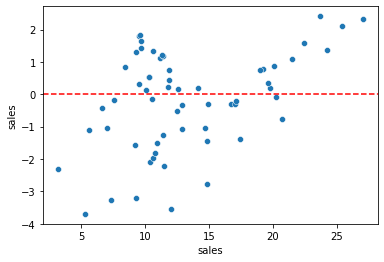

In [70]:
# plot the residuals 
# as we see the distribution of residuals is random

sns.scatterplot(x=y_test, y  = test_resudials)
plt.axhline(y=0, color='r', ls="--")

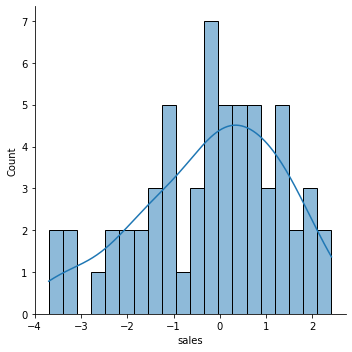

In [72]:
# now lets check if the distribution is normal


sns.displot(test_resudials, bins = 20, kde = True)

# Normaly probabiliy plot

In [73]:
import scipy as sp

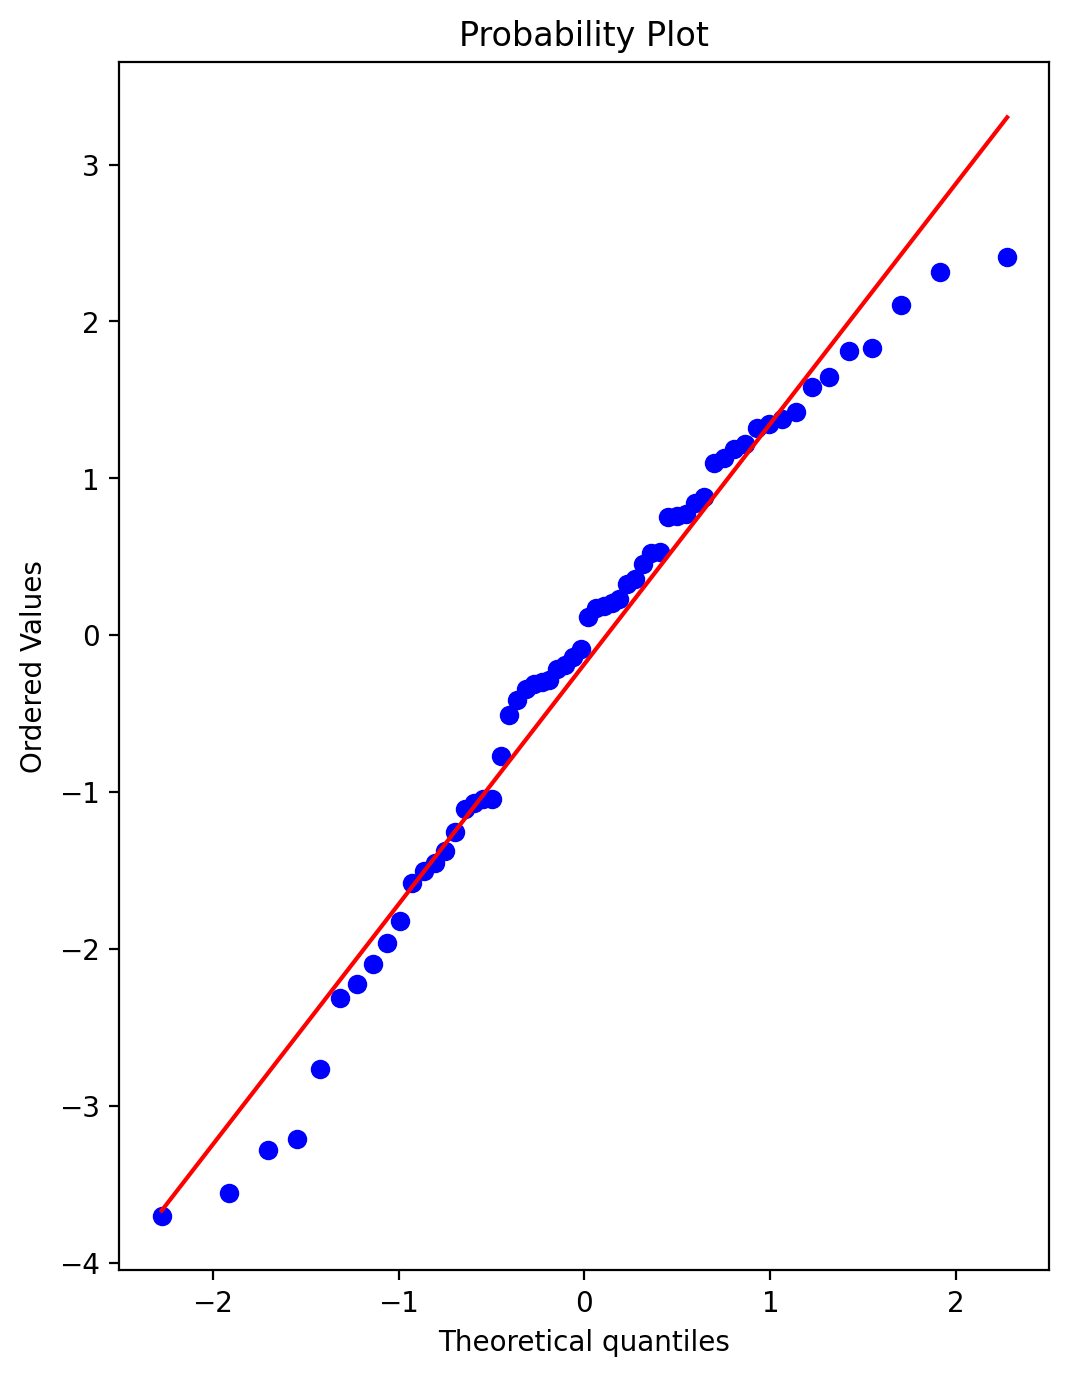

In [75]:
fig, ax = plt.subplots(figsize=(6,8), dpi = 200)

_ = sp.stats.probplot(test_resudials, plot=ax)

# 4 step Deploy model

In [76]:
# save the model 
# apply to the new data

# create an instance of new model
final_model = LinearRegression()

In [78]:
# apply to the full data set from the beggining to 
# enchance the understanding of the model 
# test this model on whole dataset

final_model.fit(x,y)

LinearRegression()

In [79]:
### coefficience of the model

final_model.coef_
# they come in the same order of the data 
# tv - radio - newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

In [80]:
x.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


## SAVING and LOADING THE MODEL

In [81]:
from joblib import dump,load

# dump - save
# load - load back the model

In [87]:
# we specify what we whant to save, and under what name 

dump(final_model, "final_sales_mode.joblib")
# this will be saved on my computer 
# in the same folder as your file, unless you specify

['final_sales_mode.joblib']

In [88]:
# to use the model 
# upload it from the computer

loaded_model = load("final_sales_mode.joblib")

In [89]:
# this is a trainded model from above 
# with coeficients 


loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [90]:
##### TEST IN REAL CASE 


# we have campaign comming up
# we have a model to predict our sales 
# 149 TV, 22 Radio, 12 Newspaper 

campaign = [[149, 22,12]]

In [91]:
loaded_model.predict(campaign)

# the prediction is sales is asstimated to be 

/Users/vazgenosipov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])